In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
normal1_small = pd.read_csv("2023-07-07_weaver_streambench_normal_np1.csv")
remote1_small = pd.read_csv("2023-07-07_weaver_streambench_remote_np1.csv")
normal1_large = pd.read_csv("2023-07-10_weaver_streambench_normal_np1.csv")
remote1_large = pd.read_csv("2023-07-10_weaver_streambench_remote_np1.csv")
normal1 = pd.concat([normal1_small, normal1_large])
remote1 = pd.concat([remote1_small, remote1_large])

In [3]:
def calculate_new_attrs(df):
    df["size"] = 1.0*df["n"]
    df["UPs-mean"] = df["size"]*df["N"]/df["time_stream-mean"]
    df["GUPs-mean"] = 1e-9*df["UPs-mean"]

In [4]:
calculate_new_attrs(normal1)
calculate_new_attrs(remote1)

In [5]:
dfs = [normal1, remote1]
labels = ["Kokkos (normal) View", "Kokkos Remote View"]

In [6]:
def figure_for_attribute(dfs, labels, attribute, ylabel = None):
    if ylabel is None:
        ylabel = attribute
    
    if len(dfs) == 0:
        print("required to have at least one line to plot")
    
    maxy = 0
    for df in dfs:
        cur_max = max(df[f"{attribute}-mean"])
        if cur_max > maxy:
            maxy = cur_max
    
    if labels is None:
        print("required to label each line")
        
    plt.figure(figsize=[10,6])
    for df, dflabel in zip(dfs,labels):
        plt.plot(df["n"], df[f"{attribute}-mean"], "--", label=dflabel)
    plt.title(f"update benchmark ({attribute.replace('_',' ')})")
    plt.legend()
    plt.xlabel("problem size (cubic array of size n)")
    plt.ylabel(ylabel)
    plt.ylim(0,int((maxy+1)*1.05))
    plt.show()

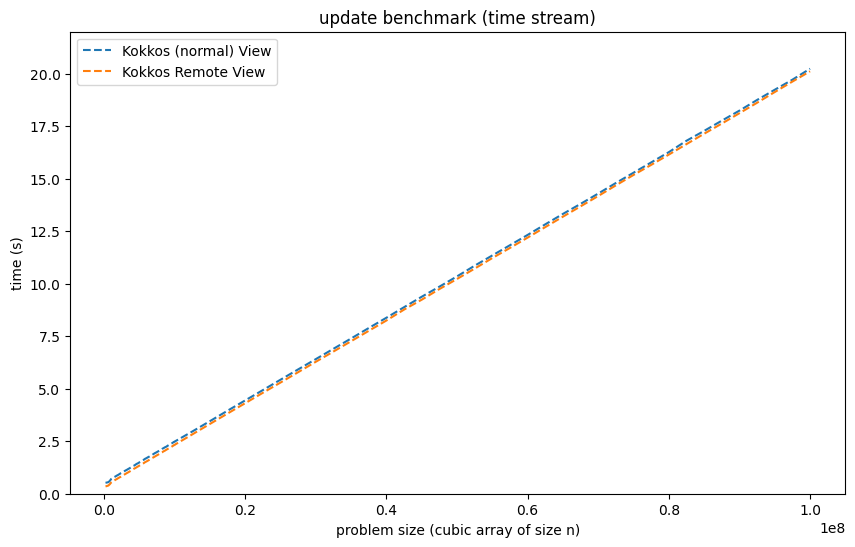

In [7]:
figure_for_attribute(dfs, labels, "time_stream", "time (s)")

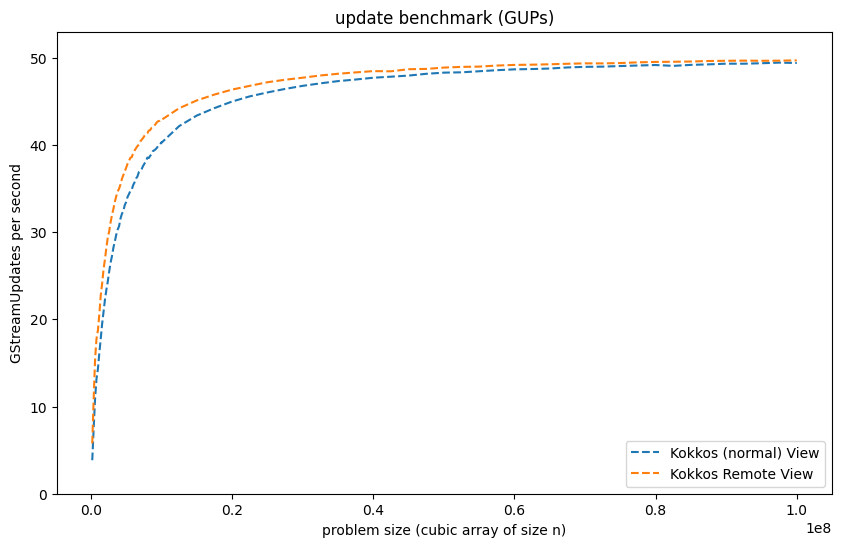

In [8]:
figure_for_attribute(dfs, labels, "GUPs", "GStreamUpdates per second")